# 1. Import Libraries and Dataframes

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import pickle
df= pd.read_pickle(r'C:\Users\william\5-2023 Instacart Basket Analysis\Data\Prepared Data\ords_prods_customers_merged.pkl')

In [5]:
# Import csv
df_dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'departments_wrangled.csv'), index_col = False)

In [4]:
path=r'C:\Users\william\5-2023 Instacart Basket Analysis'

# 2. Addressing PII Data

In [6]:
# Dropping first and last names
df=df.drop(columns = ['first_name','last_name'])

In [7]:
# Checking
df.dtypes

Unnamed: 0_x                 int64
order_id                     int64
user_id                      int64
order_number                 int64
orders_days_of_the_week      int64
time_ordered                 int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
Unnamed: 0_y                 int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
Busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
mean_order                 float64
spending_flag               object
median_ordering            float64
prior_order_flag            object
prior_ordering_flag         object
sex                         object
STATE                       object
age                 

# 3. Create Regional Segmentation Data and Spending Habits Data

In [8]:
# Creating an empty container
region=[]
# Creating a "region" column based on the "state" column
for value in df['STATE']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [9]:
df['region']=region

In [10]:
# Checking
df['region'].value_counts(dropna=False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

# 4. Create an Exclusion Flag for Low-Activity Customers

In [11]:
# Creating columns based on activity
df.loc[df['max_order']>=5,'activity_of_customer']='High order customer'
df.loc[df['max_order']<5,'activity_of_customer']='Low order customer'

In [12]:
# Checking
df['activity_of_customer'].value_counts(dropna=False)

High order customer    30992664
Low order customer      1441548
Name: activity_of_customer, dtype: int64

In [13]:
# Creating new dataframe excluding low-activity customers
df_high_activity=df[df['activity_of_customer']=='High order customer']

In [14]:
# Exporting dataframe
df_high_activity.to_pickle(os.path.join(path,'Data','Prepared Data','df_high_activity.pkl'))

# 5. Customer Profiling

In [15]:
# Creating age profile
df.loc[df['age']>65,'age_flag']='Senior'
df.loc[(df['age']<=65) & (df['age']>30),'age_flag']='Middle-age'
df.loc[df['age']<=30,'age_flag']='Young adult'

In [16]:
# Checking
df['age_flag'].value_counts(dropna=False)

Middle-age     17733494
Senior          8095218
Young adult     6605500
Name: age_flag, dtype: int64

In [17]:
# Creating income profile
df.loc[df['income']<=50000,'income_flag']='Low income'
df.loc[(df['income']>50000) & (df['income']<=100000),'income_flag']='Middle income'
df.loc[df['income']>100000,'income_flag']='High income'

In [18]:
# Checking
df['income_flag'].value_counts(dropna=False)

High income      14826772
Middle income    14009569
Low income        3597871
Name: income_flag, dtype: int64

In [19]:
# Creating department profile
df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [20]:
# Merging dataframe with department dataframe
df_merged=df.merge(df_dept,on='department_id')

In [21]:
df_merged['department'].value_counts(dropna=False)

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alcohol             153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [22]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
# Creating dependants profile
df_merged.loc[df_merged['n_dependants']==0,'family_flag']='Single'
df_merged.loc[df_merged['n_dependants']!=0,'family_flag']='Family'

In [24]:
df_merged['family_flag'].value_counts(dropna=False)

Family    24329015
Single     8105197
Name: family_flag, dtype: int64

# 6. Visualizations for Profiles

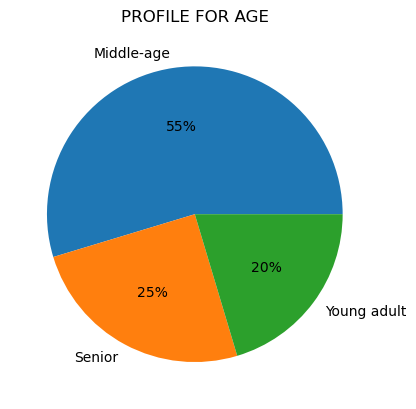

In [25]:
# Visualization for age profile
viz_profile_for_age=df['age_flag'].value_counts().plot.pie(title='PROFILE FOR AGE',label='',autopct=('%1.f%%'))

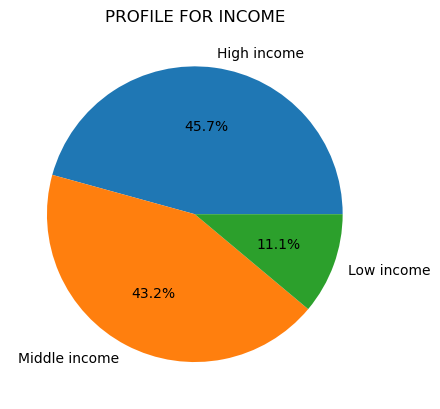

In [26]:
# Visualization for income profile
viz_profile_for_income = df_merged['income_flag'].value_counts().plot.pie(title = 'PROFILE FOR INCOME', label = '', autopct='%1.1f%%')

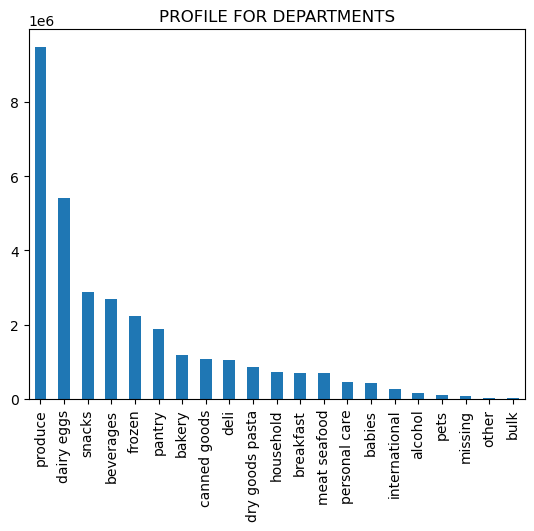

In [27]:
# Visualization for departments profile
viz_profile_for_departments = df_merged['department'].value_counts().plot.bar(title = 'PROFILE FOR DEPARTMENTS')

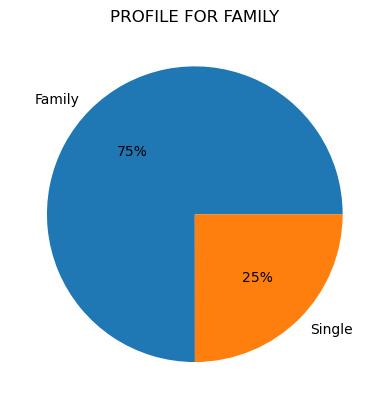

In [28]:
# Visualization for dependants profile
viz_profile_for_dependants=df_merged['family_flag'].value_counts().plot.pie(title='PROFILE FOR FAMILY',label='',autopct=('%1.f%%'))

In [29]:
# Exporting Visuals
viz_profile_for_age.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_profile_for_age.png'))

In [30]:
viz_profile_for_income.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_profile_for_income.png'))

In [31]:
viz_profile_for_dependants.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_profile_for_dependants.png'))

In [32]:
viz_profile_for_departments.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_profile_for_departments.png'))

# 7. Aggregating Profiles Based on Usage and Prices

In [33]:
# Age aggregation based on "days since prior order" and "prices"
df_merged.groupby('age_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                               max       mean  min    max      mean  min
age_flag                                                                
Middle-age                    30.0  11.103236  0.0   25.0  7.797384  1.0
Senior                        30.0  11.081283  0.0   25.0  7.798962  1.0
Young adult                   30.0  11.134688  0.0   25.0  7.787204  1.0

In [34]:
# Income aggregation based on "days since prior order" and "prices"
df_merged.groupby('income_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                                 max       mean  min    max      mean  min
income_flag                                                               
High income                     30.0  11.040160  0.0   25.0  7.963630  1.0
Low income                      30.0  11.587031  0.0   25.0  6.702746  1.0
Middle income                   30.0  11.049214  0.0   25.0  7.898732  1.0

In [35]:
# Department aggregation based on "days since prior order" and "prices"
df_merged.groupby('department').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices                
                                   max       mean  min    max       mean  min
department                                                                   
alcohol                           30.0  10.341975  0.0   15.0   8.144407  1.0
babies                            30.0  10.004465  0.0   15.0   7.638380  1.0
bakery                            30.0  11.095811  0.0   15.0   7.864723  1.0
beverages                         30.0  11.053422  0.0   15.0   7.680574  1.0
breakfast                         30.0  11.298226  0.0   14.9   8.065461  1.0
bulk                              30.0  10.104230  0.0   14.1   8.348960  1.4
canned goods                      30.0  11.656079  0.0   15.0   7.539976  1.0
dairy eggs                        30.0  10.986297  0.0   15.0   8.351964  1.0
deli                              30.0  11.345655  0.0   15.0   7.778701  1.0
dry goods pasta                   30.0  11.774450  0.0   15.0   7.350283  1.0
frozen                            30.0  11.731031  0.0   15.0   7.741434  1.0
household                         30.0  11.996490  0.0   15.0   7.384058  1.0
international                     30.0  11.291251  0.0   15.0   7.682264  1.0
meat seafood                      30.0  11.432038  0.0   25.0  16.294469  8.0
missing                           30.0  10.218559  0.0   15.0   8.660716  1.0
other                             30.0  10.952867  0.0   15.0   6.990934  1.1
pantry                            30.0  11.163426  0.0   20.0   8.009901  1.0
personal care                     30.0  11.593415  0.0   15.0   7.996657  1.0
pets                              30.0  11.868070  0.0   15.0   7.889636  1.0
produce                           30.0  10.856212  0.0   15.0   7.981708  1.0
snacks                            30.0  10.947879  0.0    7.0   4.275437  1.6

In [36]:
# Dependants aggregation based on "days since prior order" and "prices"
df_merged.groupby('family_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                               max       mean  min    max      mean  min
family_flag                                                             
Family                        30.0  11.112009  0.0   25.0  7.795974  1.0
Single                        30.0  11.080606  0.0   25.0  7.794896  1.0

# 8 and 9. Visualizations for Customer Profiles and Their Relationship to Department and Region

In [37]:
# Creating a crosstab between age and region
age_and_region=pd.crosstab(df['region'],df['age_flag'],dropna=False)

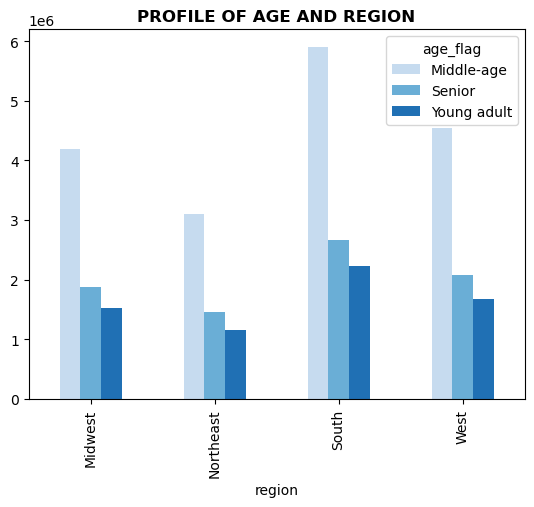

In [38]:
# Creating a bar chart between age and region
viz_bar_age_and_region=age_and_region.plot.bar(color=sns.color_palette('Blues',3))
plt.title('PROFILE OF AGE AND REGION', fontweight='bold')
plt.show()

In [39]:
# Creating a crosstab between age and department
age_and_dept=pd.crosstab(df_merged['department'],df_merged['age_flag'],dropna=False)

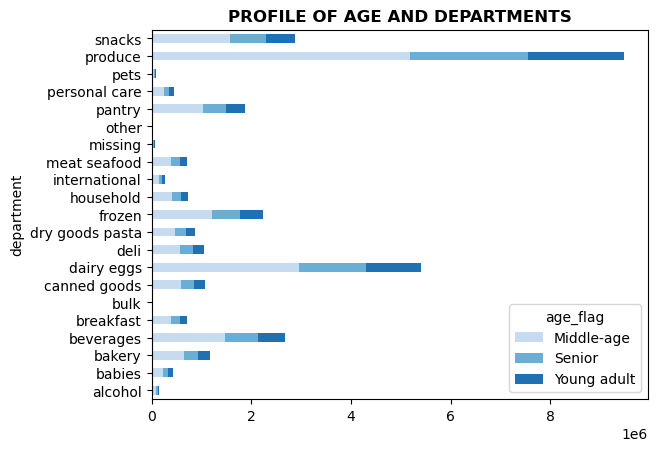

In [40]:
# Creating a stacked bar chart between age and department
viz_stacked_bar_age_and_dept=age_and_dept.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('PROFILE OF AGE AND DEPARTMENTS', fontweight='bold')
plt.show()

In [41]:
# Creating a crosstab between income and region
income_and_region=pd.crosstab(df_merged['region'],df_merged['income_flag'],dropna=False)

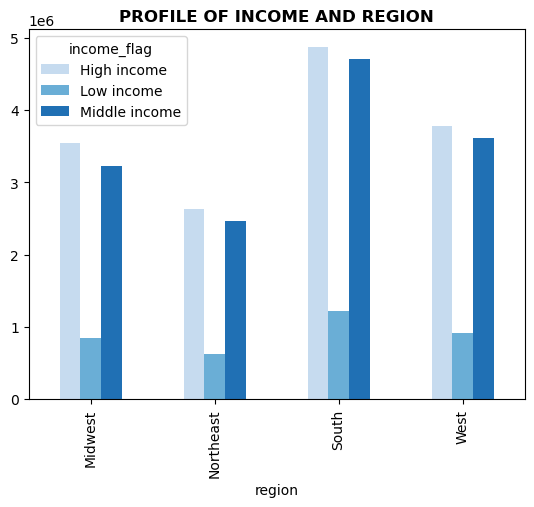

In [42]:
# Creating a bar chart between income and region
viz_bar_income_and_region=income_and_region.plot.bar(color=sns.color_palette('Blues',3))
plt.title('PROFILE OF INCOME AND REGION', fontweight='bold')
plt.show()

In [43]:
# Creating a crosstab between income and department
income_and_dept=pd.crosstab(df_merged['department'],df_merged['income_flag'],dropna=False)

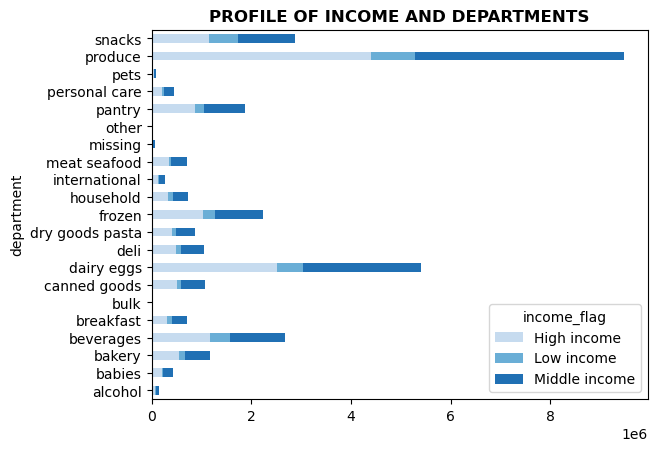

In [44]:
# Creating a stacked bar chart between income and department
viz_stacked_bar_income_and_dept=income_and_dept.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('PROFILE OF INCOME AND DEPARTMENTS', fontweight='bold')
plt.show()

In [45]:
# Creating a crosstab between dependants and region
dependants_and_region=pd.crosstab(df_merged['region'],df_merged['family_flag'],dropna=False)

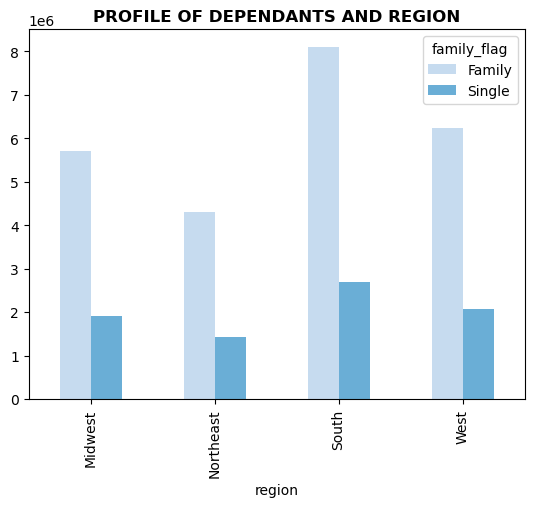

In [46]:
# Creating a bar chart between dependants and region
viz_bar_dependants_and_region=dependants_and_region.plot.bar(color=sns.color_palette('Blues',3))
plt.title('PROFILE OF DEPENDANTS AND REGION', fontweight='bold')
plt.show()

In [47]:
# Creating a crosstab between dependants and departments
family_and_dept=pd.crosstab(df_merged['department'],df_merged['family_flag'],dropna=False)

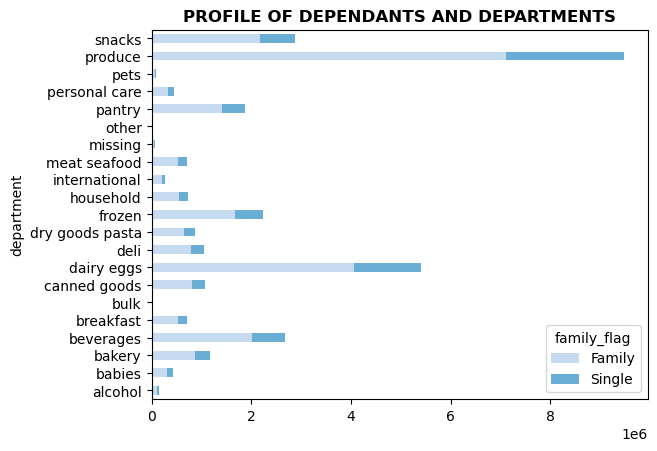

In [48]:
# Creating a stacked bar chart between dependants and department
viz_stacked_bar_dependants_and_dept=family_and_dept.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('PROFILE OF DEPENDANTS AND DEPARTMENTS', fontweight='bold')
plt.show()

In [49]:
# Exporting Visuals
viz_bar_age_and_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_bar_age_and_region.png'))

In [50]:
viz_stacked_bar_age_and_dept.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_age_and_dept.png'))

In [51]:
viz_bar_income_and_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_bar_income_and_region.png'))

In [52]:
viz_stacked_bar_income_and_dept.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_income_and_dept.png'))

In [53]:
viz_bar_dependants_and_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_bar_family_and_region.png'))

In [54]:
viz_stacked_bar_dependants_and_dept.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_family_and_dept.png'))

# 10. Export Final Dataframe

In [55]:
# Exporting the final dataframe
df_merged.to_pickle(os.path.join(path,'Data','Prepared Data','df_final.pkl'))

# Extra Visuals

In [56]:
# Import pickle
df= pd.read_pickle(r'C:\Users\william\5-2023 Instacart Basket Analysis\Data\Prepared Data\df_final.pkl')

In [57]:
# Creating a crosstab between spending and department
spending_and_dept=pd.crosstab(df['department'],df['spending_flag'],dropna=False)

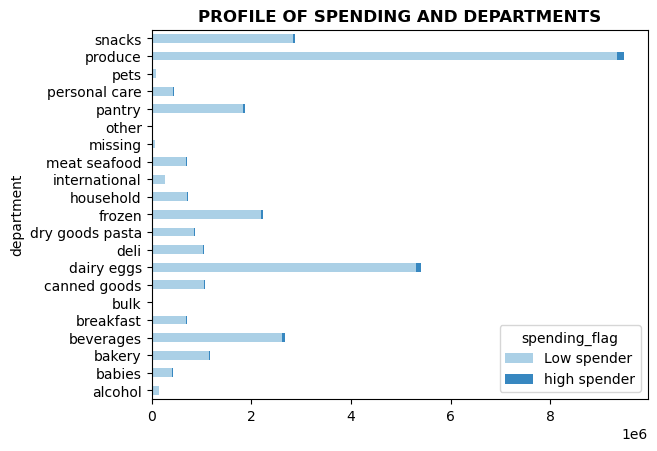

In [58]:
# Creating a stacked bar chart between spending and department
viz_stacked_bar_spending_and_dept=spending_and_dept.plot.barh(stacked=True,color=sns.color_palette('Blues',2))
plt.title('PROFILE OF SPENDING AND DEPARTMENTS', fontweight='bold')
plt.show()

In [59]:
# Exporting Visuals
viz_stacked_bar_spending_and_dept.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_spending_and_dept.png'))

In [65]:
# Creating a crosstab between spending and region
dept_and_region=pd.crosstab(df['department'],df['region'],dropna=False)

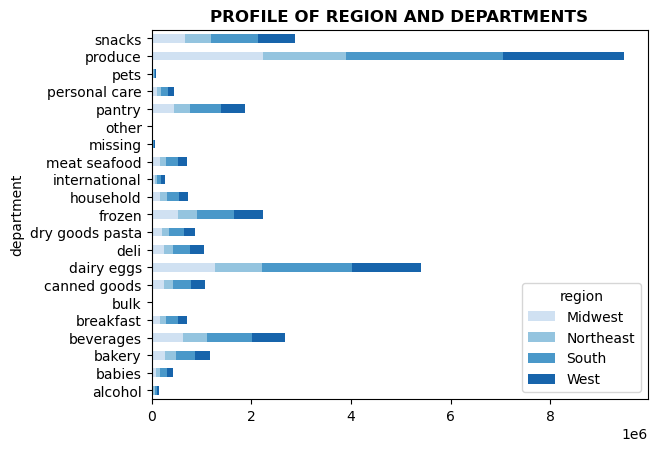

In [67]:
# Creating a stacked bar chart between income and department
viz_stacked_bar_region_and_dept=dept_and_region.plot.barh(stacked=True,color=sns.color_palette('Blues',4))
plt.title('PROFILE OF REGION AND DEPARTMENTS', fontweight='bold')
plt.show()

In [68]:
# Exporting Visuals
viz_stacked_bar_region_and_dept.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_region_and_dept.png'))

In [70]:
# Creating a crosstab between spending and region
spending_and_region=pd.crosstab(df['loyalty_flag'],df['region'],dropna=False)

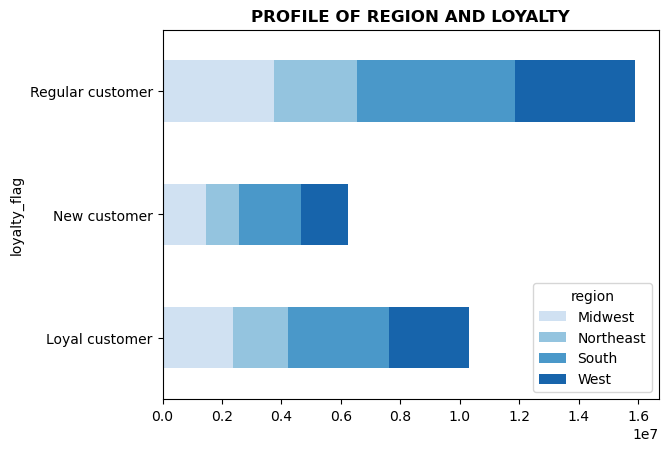

In [72]:
# Creating a stacked bar chart between spending and income
viz_stacked_bar_spending_and_region=spending_and_region.plot.barh(stacked=True,color=sns.color_palette('Blues',4))
plt.title('PROFILE OF REGION AND LOYALTY', fontweight='bold')
plt.show()

In [74]:
# Exporting Visuals
viz_stacked_bar_spending_and_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_loyalty_and_region.png'))

In [85]:
# Creating a crosstab between age and dependants
age_and_family=pd.crosstab(df['family_flag'],df['age_flag'],dropna=False)

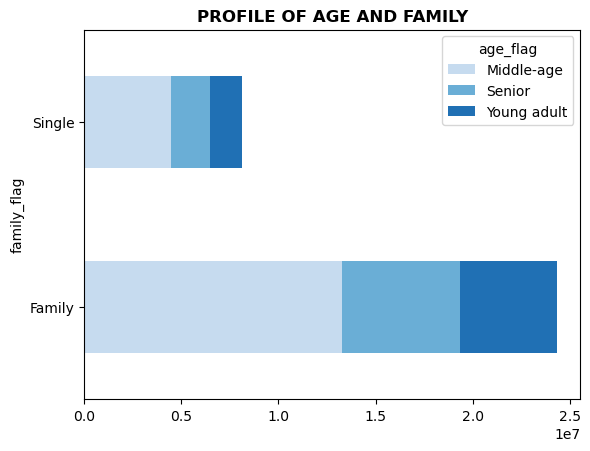

In [89]:
# Creating a stacked bar chart between age and dependants
viz_stacked_bar_age_and_family=age_and_family.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('PROFILE OF AGE AND FAMILY', fontweight='bold')
plt.show()

In [90]:
# Exporting Visuals
viz_stacked_bar_age_and_family.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_age_and_family.png'))

In [91]:
# Price range profile
df['price_range_loc'].value_counts()

Mid-range product     21890146
Low-range product     10126384
High-range product      417682
Name: price_range_loc, dtype: int64

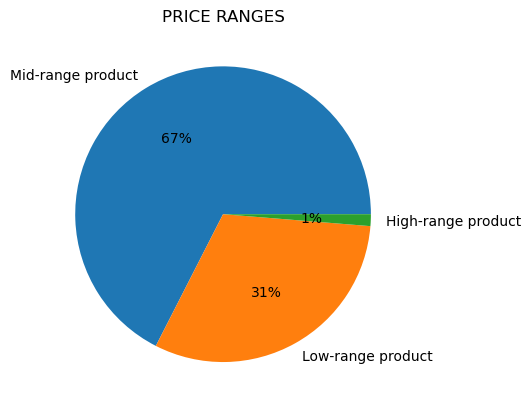

In [94]:
viz_pie_price_range=df['price_range_loc'].value_counts().plot.pie(title='PRICE RANGES',label='',autopct=('%1.f%%'))

In [95]:
# Exporting Visuals
viz_pie_price_range.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_pie_price_range.png'))

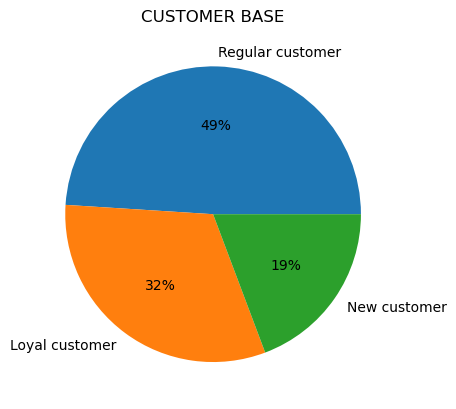

In [96]:
viz_pie_loyalty=df['loyalty_flag'].value_counts().plot.pie(title='CUSTOMER BASE',label='',autopct=('%1.f%%'))

In [97]:
# Exporting Visuals
viz_pie_loyalty.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_pie_loyalty.png'))

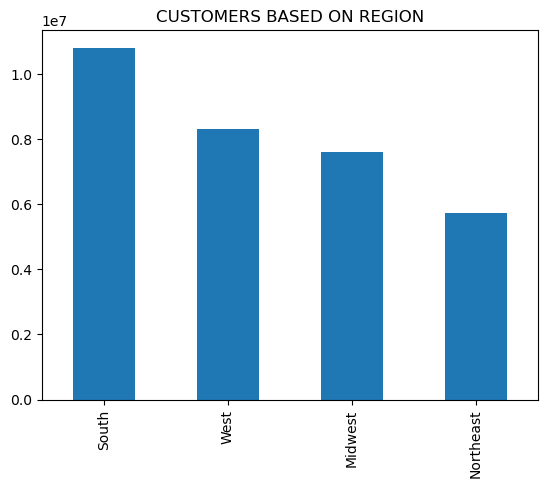

In [100]:
# Visualization
viz_bar_region=df['region'].value_counts().plot.bar(title='CUSTOMERS BASED ON REGION')

In [101]:
# Exporting Visuals
viz_bar_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_bar_region.png'))